<a href="https://colab.research.google.com/github/lucamachado49/feedforward-neuralnet/blob/main/Feedforward_diabetes_dataset_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [4]:
# Carregar e explorar o dataset
df = pd.read_csv('diabetes.csv')

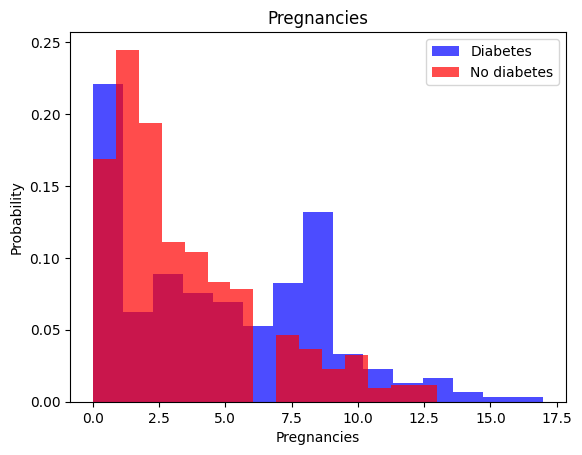

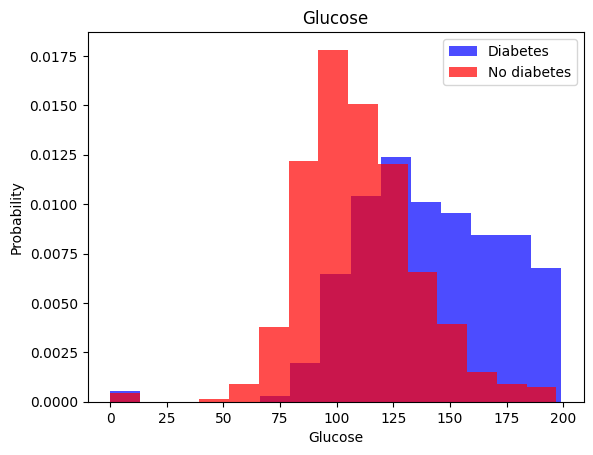

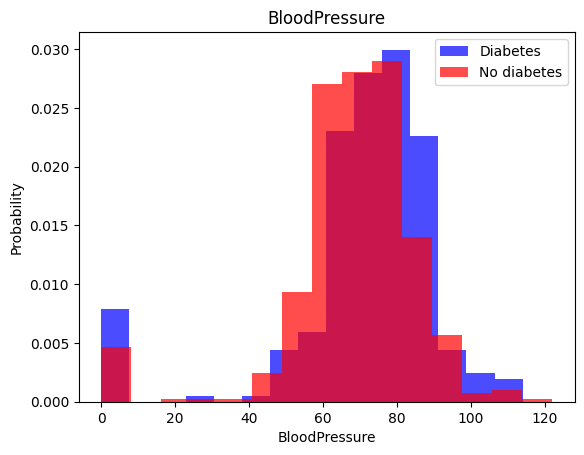

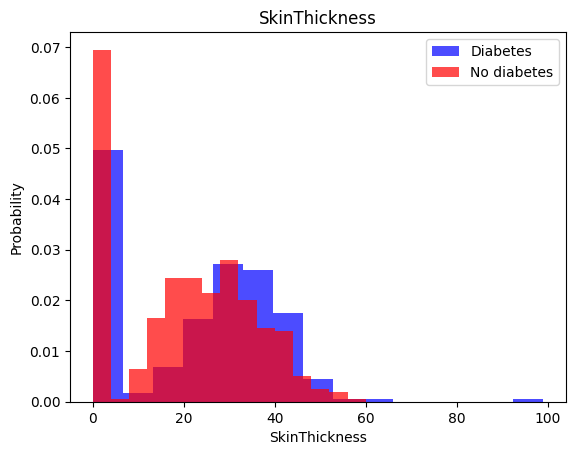

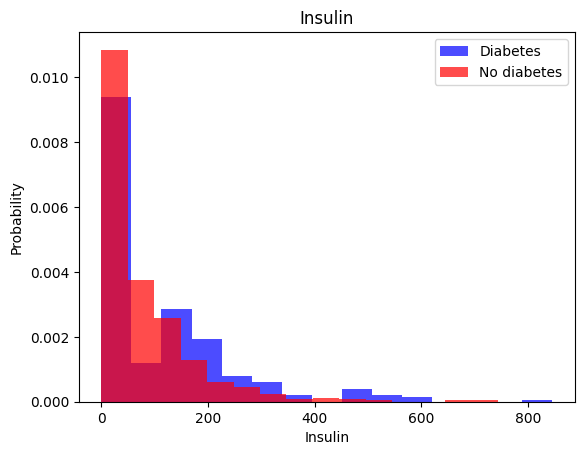

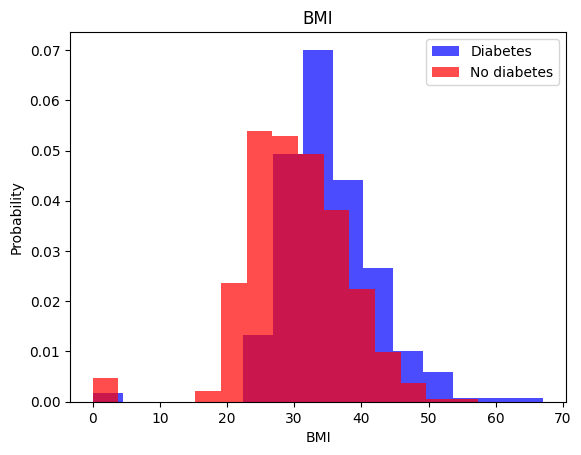

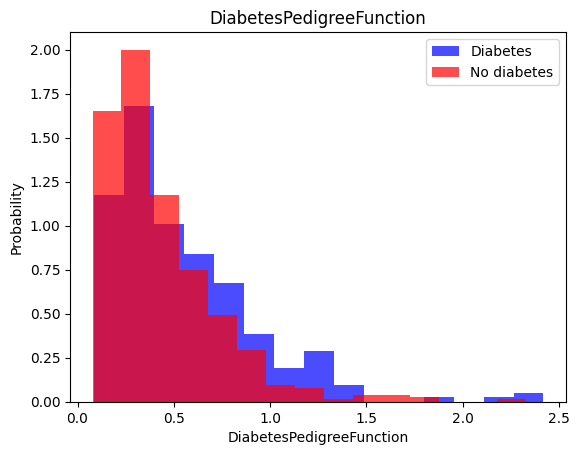

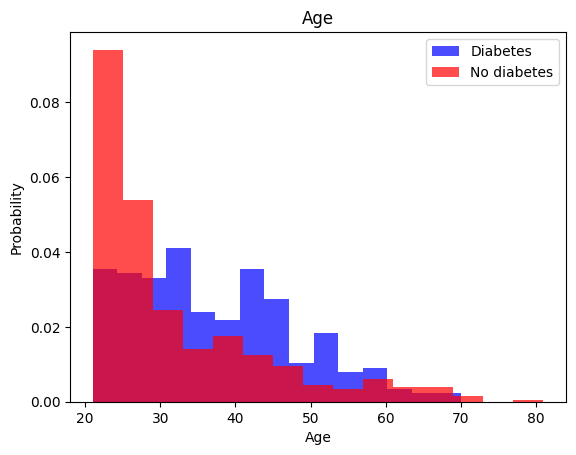

In [5]:
# Visualizar histogramas para cada variável
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome'] == 1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=15)
    plt.hist(df[df['Outcome'] == 0][label], color='red', label='No diabetes', alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [6]:
# Preparação dos dados
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# Balanceamento dos dados
over = RandomOverSampler()
X, y = over.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [8]:
# Divisão em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [9]:
# Construção do modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [10]:
# Treinamento do modelo com histórico salvo
history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4302 - loss: 0.7600 - val_accuracy: 0.6000 - val_loss: 0.6792
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6086 - loss: 0.6746 - val_accuracy: 0.6800 - val_loss: 0.6344
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7315 - loss: 0.6296 - val_accuracy: 0.7050 - val_loss: 0.6017
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.6102 - val_accuracy: 0.7150 - val_loss: 0.5762
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.5682 - val_accuracy: 0.7150 - val_loss: 0.5531
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.5609 - val_accuracy: 0.7350 - val_loss: 0.5343
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7283 - loss: 0.5530 - val_accuracy: 0.7450 - val_loss: 0.5188
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7463 - loss: 0.5398 - val_accuracy: 0.7650 - val_loss:

In [11]:
# Avaliação no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7936 - loss: 0.4616 
Test Loss: 0.4829, Test Accuracy: 0.7700


### Visualização dos Modelos

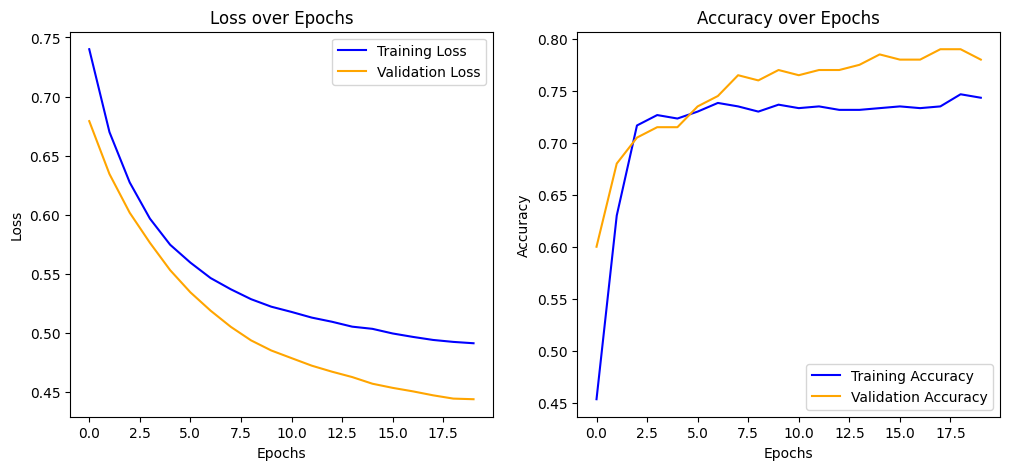

In [12]:
# 1. Curva de Aprendizado
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Curva de Aprendizado: Loss e Accuracy

O que mostra:
- O gráfico da perda (loss) mostra como o erro do modelo diminui ao longo das épocas para os conjuntos de treinamento e validação.
- O gráfico da acurácia (accuracy) mostra como a precisão do modelo melhora ao longo do tempo.

Como interpretar:
- Se as linhas de treinamento e validação seguem trajetórias similares, o modelo está generalizando bem.
- Um gap grande entre a perda/acurácia de treinamento e validação pode indicar overfitting.
- Se as curvas de perda não convergem ou a acurácia permanece baixa, o modelo pode estar underfitting.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


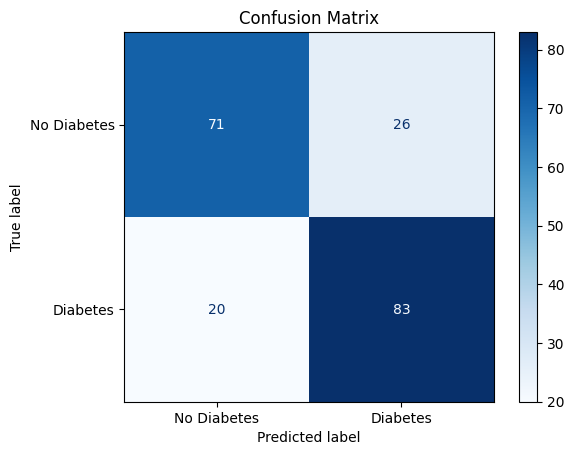

In [13]:
# 2. Matriz de Confusão
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


### Matriz de Confusão
O que mostra:
- Uma tabela que apresenta os valores de previsões corretas e incorretas.
- As células principais indicam:
True Positives (Diabetes previsto corretamente).
True Negatives (Sem diabetes previsto corretamente).
False Positives (Sem diabetes previsto como diabetes).
False Negatives (Diabetes previsto como sem diabetes).

Como interpretar:
- Valores altos na diagonal principal indicam que o modelo está prevendo bem as classes.
- Muitos falsos positivos ou falsos negativos sugerem problemas na distinção entre as classes.
- Útil para ajustar o limiar de classificação.

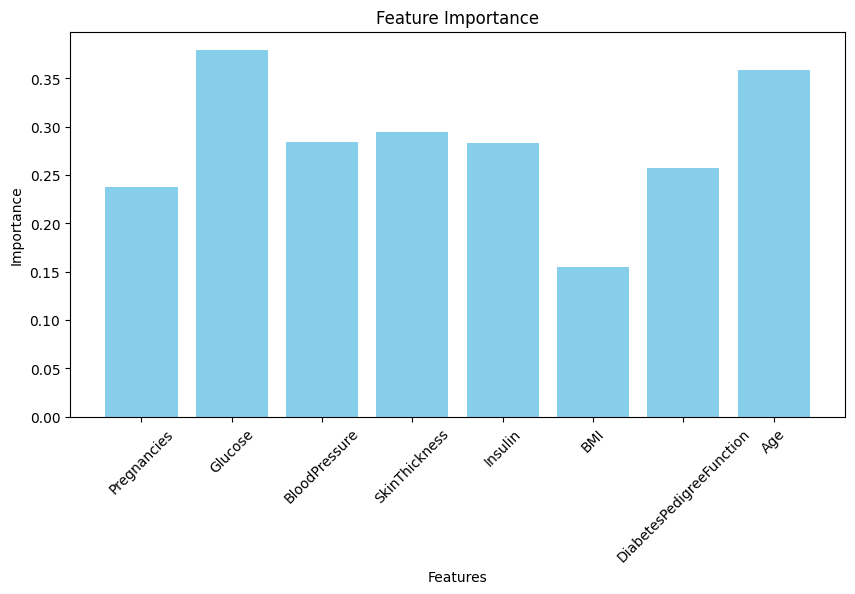

In [14]:
# 3. Importância dos Recursos
weights, biases = model.layers[0].get_weights()
feature_importance = np.mean(np.abs(weights), axis=1)

features = df.columns[:-1]
plt.figure(figsize=(10, 5))
plt.bar(features, feature_importance, color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

### Importância dos Recursos
O que mostra:
- Um gráfico de barras indicando a magnitude da importância de cada variável para a previsão do modelo.
- Calculado com base nos pesos absolutos da primeira camada da rede neural.

Como interpretar:
- Recursos com barras mais altas contribuem mais para o diagnóstico de diabetes.
- Você pode usar essa informação para priorizar variáveis importantes ou explorar a relevância médica/biológica dos fatores mais significativos.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


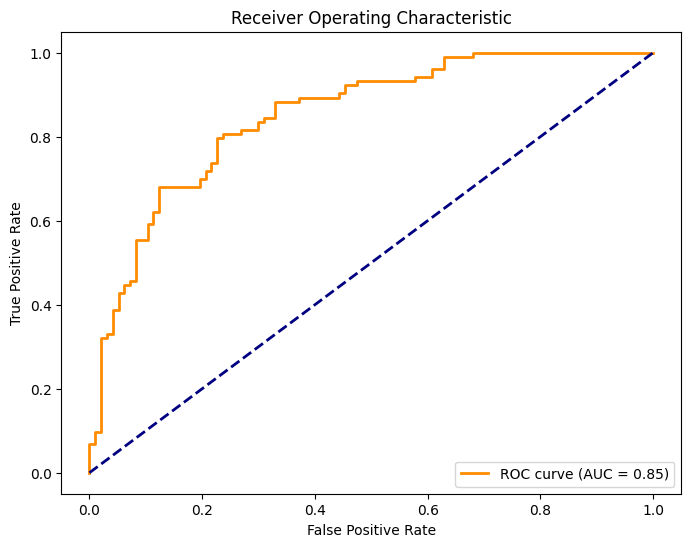

In [15]:
# 4. Curva ROC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Curva ROC e AUC
O que mostra:
- A relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (1 - especificidade) para diferentes limiares de decisão.
- O valor da área sob a curva (AUC) indica a capacidade geral do modelo de distinguir entre as classes.

Como interpretar:
- Uma AUC de 0.5 significa desempenho aleatório, enquanto uma AUC próxima de 1 indica excelente desempenho.
- O ponto da curva mais próximo do canto superior esquerdo é o melhor equilíbrio entre sensibilidade e especificidade.
- Este gráfico é essencial para avaliar a robustez do modelo e ajustar o limiar.